In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
Days=30


In [11]:
stocks =  pd.read_csv('stocks_data.csv')
sentament = pd.read_csv('reddit_stock_data_sentiment.csv')

In [ ]:
# score_list = [] 

# for i in range(len(sentament)):
#     score = 0  
#     valid_days = 0  
#     for x in range(Days):
#         if i + x < len(sentament):
#             score += sentament[i + x]['sentiment_score']
#             valid_days += 1
#     if valid_days > 0:
#         avg_score = score / valid_days
#     else:
#         avg_score = 0  
#     sentament[i]['sentiment_score'] = avg_score 
#     if i < len(sentiment_score):
#         sentament[i]['sentiment_score'] = stocks.loc[i, 'sentiment_score'] 

In [12]:
from datetime import datetime, timedelta

# Adjust the date in 'created_utc' to the next day
sentament['created_utc_next_day'] = sentament['created_utc'].apply(
    lambda x: (datetime.strptime(x.split(' ')[0], '%Y-%m-%d') + timedelta(days=1)).strftime('%Y-%m-%d')
)

# Update the 'stock' column to match with the day after
sentament['stock'] = sentament.apply(
    lambda row: stocks.loc[stocks['Date'] == row['created_utc_next_day'], row['mentioned_tickers']].values[0]
    if row['mentioned_tickers'] in stocks.columns and not stocks.loc[stocks['Date'] == row['created_utc_next_day'], row['mentioned_tickers']].empty
    else None,
    axis=1
)

sentament.head(100)
sentament.to_csv('1.csv', index=False)

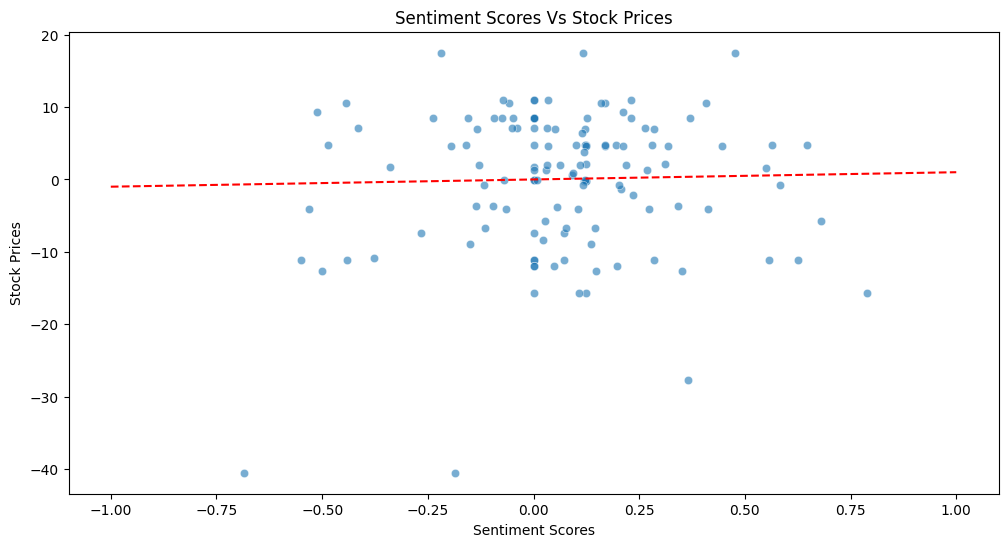

In [13]:
df = sentament[['sentiment_score', 'stock']].dropna()  # Drop rows with NaN values
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sentiment_score', y='stock', data=df, alpha=0.6)
plt.title('Sentiment Scores Vs Stock Prices')
plt.xlabel('Sentiment Scores')
plt.ylabel('Stock Prices')
plt.plot([-1, 1], [-1, 1], 'r--')  # Add a reference line
plt.show()